In [196]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

from scipy.io import arff
import pandas as pd

# Load the data
data_train, meta_train = arff.loadarff('./FordA/FordA_TRAIN.arff')
data_test, meta_test = arff.loadarff('./FordA/FordA_TEST.arff')

# Convert the data to a pandas DataFrame
df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)
print(df_train.shape)
print(df_test.shape)

(3601, 501)
(1320, 501)


In [197]:
# Convert the target to integer for easier manipulation
df_train['target'] = df_train['target'].apply(lambda x: x.decode())
df_test['target'] = df_test['target'].apply(lambda x: x.decode())

In [198]:
df_test

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att492,att493,att494,att495,att496,att497,att498,att499,att500,target
0,-0.140402,0.171641,0.302044,0.232804,0.033853,-0.224183,-0.469987,-0.645396,-0.617700,-0.367280,...,0.390903,0.974831,1.258717,1.143316,0.647092,-0.049582,-0.690402,-0.976596,-0.794263,-1
1,0.334038,0.322253,0.453844,0.671852,0.887897,1.020469,1.059750,1.030290,0.950746,0.858436,...,-0.346502,-0.924912,-1.208716,-1.247996,-1.139974,-1.041772,-1.041772,-1.159614,-1.375659,-1
2,0.716686,0.744367,0.725913,0.661325,0.555217,0.413585,0.246580,0.065273,-0.121109,-0.301032,...,2.276019,1.219548,0.081881,-1.050250,-2.092881,-2.983269,-3.675281,-4.136622,-4.339612,-1
3,1.240282,1.331189,1.386596,1.383220,1.305979,1.142784,0.878613,0.532291,0.140025,-0.258262,...,-1.124551,-1.302012,-1.340564,-1.271440,-1.146352,-1.011328,-0.931222,-0.934498,-1.001288,1
4,-1.159478,-1.204174,-1.167605,-1.033518,-0.818166,-0.558119,-0.299291,-0.093691,0.022770,0.044337,...,0.441438,0.206176,-0.006941,-0.146919,-0.183082,-0.112382,0.008987,0.131413,0.186266,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,0.143630,-0.135823,-0.510278,-0.850804,-1.058080,-1.082756,-0.961845,-0.748399,-0.575669,-0.569500,...,0.865397,1.366315,1.896845,2.229968,2.192954,1.761128,0.939424,-0.096588,-1.076587,-1
1316,-0.165568,-0.504614,-0.780065,-0.937044,-0.950518,-0.854054,-0.701736,-0.544270,-0.424473,-0.357913,...,-1.916656,-1.774917,-1.439674,-0.935756,-0.298758,0.406564,1.100995,1.722323,2.191682,1
1317,0.710084,0.593979,0.381886,0.127285,-0.112304,-0.274140,-0.312698,-0.195008,0.063567,0.398281,...,0.272573,-0.040822,-0.235795,-0.304746,-0.270086,-0.192379,-0.126553,-0.117822,-0.189094,1
1318,0.006847,-0.140624,-0.270594,-0.378835,-0.461983,-0.515125,-0.538119,-0.532769,-0.495602,-0.436697,...,0.176298,-0.031868,-0.262996,-0.492936,-0.698291,-0.870596,-1.000708,-1.084108,-1.109963,1


In [205]:
df_test.target

0       -1
1       -1
2       -1
3        1
4       -1
        ..
1315    -1
1316     1
1317     1
1318     1
1319     1
Name: target, Length: 1320, dtype: object

In [199]:
# df_train을 train과 val로 나누기 전 라벨열을 먼저 분리
X = df_train.iloc[:, :-1].values
y = df_train['target'].values

# df_test에서 라벨열 분리
X_test = df_test.iloc[:, :-1].values
y_test = df_test['target'].values

# # 라벨열이 분리 된 df_train을 train과 val로 분할
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape)
# print(X_val.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_val.shape)
# print(y_test.shape)

In [200]:
# 학습데이터 reshape
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train = X.reshape(X.shape[0], X.shape[1], 1)
# X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 라벨열 원핫 인코딩
# y_train = to_categorical(y_train)
y_train = to_categorical(y)
# y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(X_train.shape)
# print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
# print(y_val.shape)
print(y_test.shape)

(3601, 500, 1)
(1320, 500, 1)
(3601, 2)
(1320, 2)


Epoch 1/10
90/90 [==============================] - 0s 1ms/step - loss: 0.7289 - accuracy: 0.5670 - val_loss: 0.6559 - val_accuracy: 0.6103
Epoch 2/10
90/90 [==============================] - 0s 551us/step - loss: 0.5939 - accuracy: 0.6962 - val_loss: 0.5752 - val_accuracy: 0.7351
Epoch 3/10
90/90 [==============================] - 0s 625us/step - loss: 0.5171 - accuracy: 0.8309 - val_loss: 0.5007 - val_accuracy: 0.8793
Epoch 4/10
90/90 [==============================] - 0s 574us/step - loss: 0.4499 - accuracy: 0.9219 - val_loss: 0.4384 - val_accuracy: 0.9417
Epoch 5/10
90/90 [==============================] - 0s 626us/step - loss: 0.3982 - accuracy: 0.9719 - val_loss: 0.3937 - val_accuracy: 0.9639
Epoch 6/10
90/90 [==============================] - 0s 576us/step - loss: 0.3540 - accuracy: 0.9882 - val_loss: 0.3462 - val_accuracy: 0.9792
Epoch 7/10
90/90 [==============================] - 0s 586us/step - loss: 0.3155 - accuracy: 0.9958 - val_loss: 0.3049 - val_accuracy: 0.9917
Epoch 8/

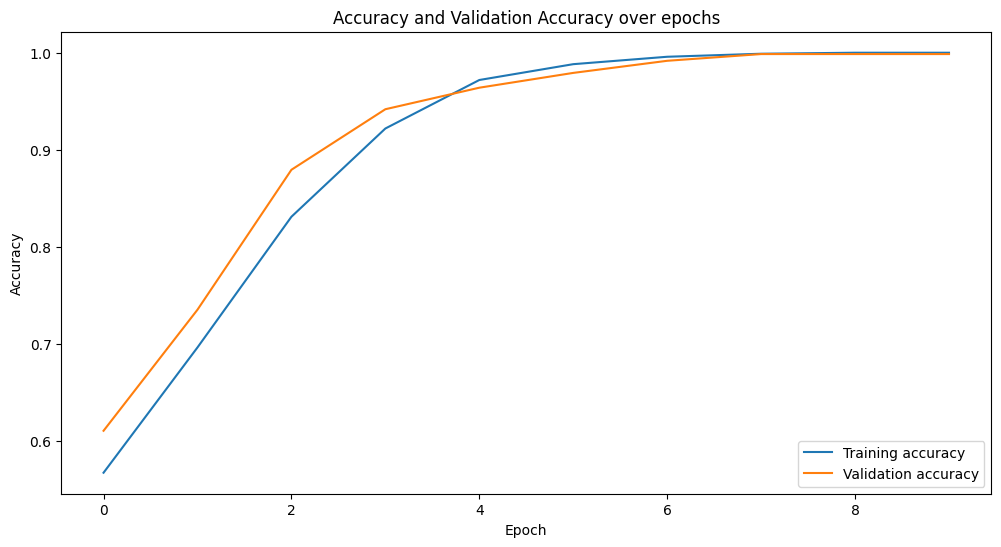

Max train acc : 1.0
Max val acc: 0.9986130595207214

42/42 [==============================] - 0s 487us/step - loss: 0.2715 - accuracy: 0.9992
test acrr  0.9992424249649048
test loss  0.27152153849601746
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_47 (Flatten)        (None, 500)               0         
                                                                 
 dense_47 (Dense)            (None, 2)                 1002      
                                                                 
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
_________________________________________________________________


In [201]:
# Define the model
model = Sequential()
# model.add(Conv1D(64, 3, activation='relu', padding='same', input_shape=(500, 1)))
# model.add(Flatten())
model.add(Flatten(input_shape=(500, 1)))
# model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# # Load the model
# from keras.models import load_model
# model = load_model('gpt_cnn_10.h5')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ModelCheckpoint 객체 생성
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

# Train the model
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, callbacks=[checkpoint])

# Plotting the accuracy and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy and Validation Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# 학습 중 베스트 정확도 출력
max_train_accuracy = max(history.history['accuracy'])
max_val_accuracy = max(history.history['val_accuracy'])
print(f'Max train acc : {max_train_accuracy}')
print(f'Max val acc: {max_val_accuracy}\n')

#  베스트 모델로 평가 (베스트 모델은 callbacks에 설정 됨)
model = load_model('best_model.h5')
scores = model.evaluate(X_test, y_test)
print('test acrr ', scores[1])
print('test loss ', scores[0])

model.summary()

In [202]:
history.history['accuracy']

[0.5670138597488403,
 0.6961805820465088,
 0.8309027552604675,
 0.921875,
 0.971875011920929,
 0.988194465637207,
 0.9958333373069763,
 0.9989583492279053,
 1.0,
 1.0]

In [203]:
np.argmax(history.history['accuracy'])

8

In [204]:
history.history['loss']

[0.728937029838562,
 0.5938811898231506,
 0.5170985460281372,
 0.4498966336250305,
 0.3981633186340332,
 0.3539753258228302,
 0.3154711127281189,
 0.2827456593513489,
 0.24978147447109222,
 0.2263193577528]